In [3]:
# VGG19 적재

In [4]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19

In [5]:
!wget https://git.io/JtRjg -O hot-dog-not-hot-dog.tar.gz

--2023-01-04 07:52:31--  https://git.io/JtRjg
Resolving git.io (git.io)... 140.82.114.22
Connecting to git.io (git.io)|140.82.114.22|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rickiepark/dl-illustrated/raw/master/notebooks/hot-dog-not-hot-dog.tar.gz [following]
--2023-01-04 07:52:31--  https://github.com/rickiepark/dl-illustrated/raw/master/notebooks/hot-dog-not-hot-dog.tar.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/dl-illustrated/master/notebooks/hot-dog-not-hot-dog.tar.gz [following]
--2023-01-04 07:52:31--  https://raw.githubusercontent.com/rickiepark/dl-illustrated/master/notebooks/hot-dog-not-hot-dog.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to 

In [6]:
# import urllib
# urllib.request.urlretrieve('https://git.io/JtRjg','hot-dog-not-hot-dog.tar.gz')


In [7]:
!tar -xvzf '/content/hot-dog-not-hot-dog.tar.gz'

hot-dog-not-hot-dog/
hot-dog-not-hot-dog/train/
hot-dog-not-hot-dog/train/not_hot_dog/
hot-dog-not-hot-dog/train/not_hot_dog/232844.jpg
hot-dog-not-hot-dog/train/not_hot_dog/223676.jpg
hot-dog-not-hot-dog/train/not_hot_dog/146029.jpg
hot-dog-not-hot-dog/train/not_hot_dog/211973.jpg
hot-dog-not-hot-dog/train/not_hot_dog/96213.jpg
hot-dog-not-hot-dog/train/not_hot_dog/824157.jpg
hot-dog-not-hot-dog/train/not_hot_dog/126784.jpg
hot-dog-not-hot-dog/train/not_hot_dog/130384.jpg
hot-dog-not-hot-dog/train/not_hot_dog/222138.jpg
hot-dog-not-hot-dog/train/not_hot_dog/110171.jpg
hot-dog-not-hot-dog/train/not_hot_dog/776077.jpg
hot-dog-not-hot-dog/train/not_hot_dog/204169.jpg
hot-dog-not-hot-dog/train/not_hot_dog/166821.jpg
hot-dog-not-hot-dog/train/not_hot_dog/766638.jpg
hot-dog-not-hot-dog/train/not_hot_dog/816725.jpg
hot-dog-not-hot-dog/train/not_hot_dog/180453.jpg
hot-dog-not-hot-dog/train/not_hot_dog/250720.jpg
hot-dog-not-hot-dog/train/not_hot_dog/183313.jpg
hot-dog-not-hot-dog/train/not_ho

In [8]:
# 이미지 재너레이터
train_datagen =  ImageDataGenerator(
    rescale = 1.0/255.0 , 
    rotation_range =30,
    horizontal_flip = True
)

val_datagen =  ImageDataGenerator(
    rescale = 1.0/255.0     
)
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    directory = '/content/hot-dog-not-hot-dog/train',
    target_size = (224,224) ,
    classes = ['hot_dog','not_hot_dog'],
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True,
    seed = 42  
)
val_generator = train_datagen.flow_from_directory(
    directory = '/content/hot-dog-not-hot-dog/test',
    target_size = (224,224) ,
    classes = ['hot_dog','not_hot_dog'],
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True,
    seed = 42  
)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
vgg19 = VGG19(
    include_top = False,
    input_shape = (224,224,3)
)

80134624/80134624 [==============================] - 0s 0us/step


In [10]:
# 모든 층을 동결....  미세조정방식
for layer in vgg19.layers:
  layer.trainable = False


In [11]:
# 원하는 출력 결과를 얻는 완전연결층 
model  = Sequential()
model.add(vgg19)

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator,epochs=16, validation_data = val_generator)

Epoch 1/16
16/16 [==============================] - 29s 1s/step - loss: 1.4620 - accuracy: 0.5361 - val_loss: 0.5322 - val_accuracy: 0.7140
Epoch 2/16
16/16 [==============================] - 15s 928ms/step - loss: 0.7448 - accuracy: 0.6606 - val_loss: 0.5904 - val_accuracy: 0.6980
Epoch 3/16
16/16 [==============================] - 14s 916ms/step - loss: 0.5221 - accuracy: 0.7590 - val_loss: 0.5806 - val_accuracy: 0.7200
Epoch 4/16
16/16 [==============================] - 14s 920ms/step - loss: 0.4379 - accuracy: 0.7972 - val_loss: 0.5397 - val_accuracy: 0.7440
Epoch 5/16
16/16 [==============================] - 14s 920ms/step - loss: 0.4748 - accuracy: 0.7791 - val_loss: 0.6008 - val_accuracy: 0.7340
Epoch 6/16
16/16 [==============================] - 14s 912ms/step - loss: 0.4102 - accuracy: 0.8313 - val_loss: 0.5650 - val_accuracy: 0.7640
Epoch 7/16
16/16 [==============================] - 14s 914ms/step - loss: 0.3428 - accuracy: 0.8474 - val_loss: 0.4399 - val_accuracy: 0.7960
Ep

In [ ]:
vgg19.summary()

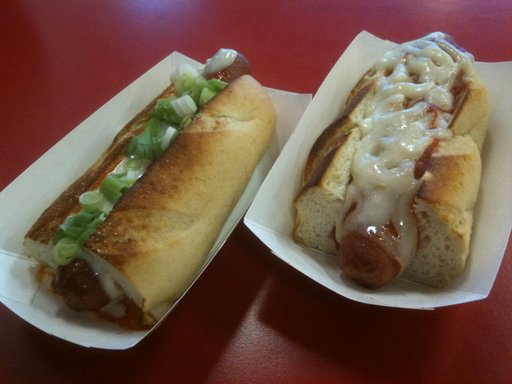

In [33]:
test_one_file_path = '/content/hot-dog-not-hot-dog/test/hot_dog/133245.jpg'
# 이미지 읽어온다
# 이미지를 numpy형태로 변환  224, 224 형태로 리쉐이프
# 미니배치가 들어갈 맨 앞자리를 1로 변환
img = keras.preprocessing.image.load_img(test_one_file_path)
img

In [34]:
img_numpy = keras.utils.img_to_array(img)
img_numpy.shape

(384, 512, 3)

In [35]:
import tensorflow as tf
temp = tf.image.resize(img_numpy, [224,224])
temp = tf.expand_dims(temp,axis=0)

In [36]:
model.predict(temp)

1/1 [==============================] - 0s 20ms/step


array([[1., 0.]], dtype=float32)